In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [8]:
data = pd.read_csv('data.csv', index_col='DATE', parse_dates=True)
data.head()

,SOUID,TG,Q_TG
DATE,,,
2015-01-01,260524,25,0
2015-01-02,260524,63,0
2015-01-03,260524,79,0
2015-01-04,260524,46,0
2015-01-05,260524,10,0


# Preprocessing

In [10]:
data = data.drop('SOUID', axis=1)
data = data.drop('Q_TG', axis=1)

data['TG'] = data['TG'] / 10

data.columns = ["TEMP"]
data.head()

,TEMP
DATE,
2015-01-01,2.5
2015-01-02,6.3
2015-01-03,7.9
2015-01-04,4.6
2015-01-05,1.0


<Axes: xlabel='DATE'>

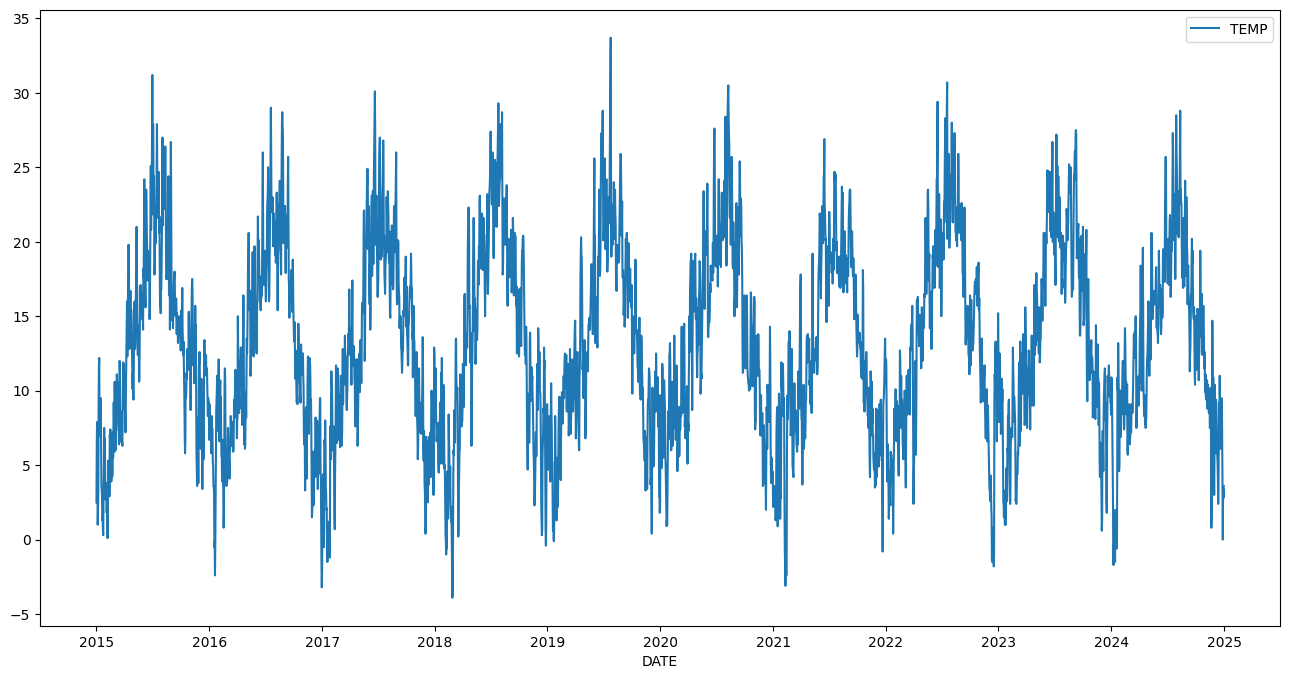

In [11]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=data)

# Time Series Decomposition

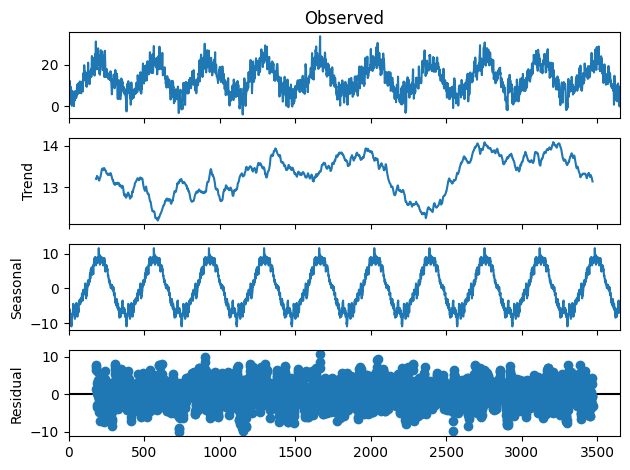

In [6]:
wave = sm.tsa.seasonal_decompose(data['TEMP'].values, period=365).plot()

# Conversion to Monthly Data

In [13]:
data_month = data.resample('M').mean()
data_month.head()

<ipython-input-13-17c441727a05>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_month = data.resample('M').mean()


,TEMP
DATE,
2015-01-31,5.177419
2015-02-28,4.760714
2015-03-31,8.774194
2015-04-30,13.220000
2015-05-31,14.835484


# ARMA

Hyperparameter Optimization using Grid Search

In [15]:
sm.tsa.arma_order_select_ic(data_month['TEMP'], ic='aic')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'aic':             0           1           2
 0  763.549642  659.431937  622.454010
 1  635.196483  603.291266  657.131586
 2  574.104862  507.842501  461.288258
 3  550.612307  499.995021  460.088364
 4  505.265683  483.345125  459.008704,
 'aic_min_order': (np.int64(4), np.int64(2))}

Modelisation

In [17]:
#d=0

arima_model1 = sm.tsa.ARIMA(data_month['TEMP'], order=(4, 0, 2))
arima_result1 = arima_model1.fit()
arima_result1.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TEMP   No. Observations:                  120
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -221.504
Date:                Tue, 03 Jun 2025   AIC                            459.009
Time:                        10:57:28   BIC                            481.309
Sample:                    01-31-2015   HQIC                           468.065
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2375      0.138     95.610      0.000      12.966      13.509
ar.L1          1.9106      0.099     19.337      0.000       1.717       2.104
ar.L2         -1.4807      0.211     -7.022      0.000      -1.894      -1.067
ar.L3          0.4753      0.217      2.194      0.028       0.051       0.900
ar.L4         -0.1713      0.105     -1.634      0.102      -0.377       0.034
ma.L1         -1.7258      3.327     -0.519      0.604      -8.246       4.794
ma.L2          0.9993      3.844      0.260      0.795      -6.535       8.534
sigma2         2.0997      8.047      0.261      0.794     -13.671      17.871
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.96   Prob(JB):                         0.73
Heteroskedasticity (H):               0.75   Skew:                            -0.18
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
#d=1

arima_model1 = sm.tsa.ARIMA(data_month['TEMP'], order=(4, 1, 2))
arima_result1 = arima_model1.fit()
arima_result1.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TEMP   No. Observations:                  120
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -235.302
Date:                Tue, 03 Jun 2025   AIC                            484.605
Time:                        10:55:46   BIC                            504.059
Sample:                    01-31-2015   HQIC                           492.505
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1626      0.114     10.230      0.000       0.940       1.385
ar.L2         -0.4648      0.166     -2.795      0.005      -0.791      -0.139
ar.L3          0.1971      0.157      1.259      0.208      -0.110       0.504
ar.L4         -0.4269      0.102     -4.189      0.000      -0.627      -0.227
ma.L1         -1.6496      0.096    -17.262      0.000      -1.837      -1.462
ma.L2          0.6659      0.094      7.057      0.000       0.481       0.851
sigma2         2.8385      0.386      7.345      0.000       2.081       3.596
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.04
Prob(Q):                              0.75   Prob(JB):                         0.60
Heteroskedasticity (H):               0.92   Skew:                            -0.22
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMA

Hyperparameter Optimization using Custom Grid Search

In [18]:
import itertools

p = q= range(0, 3)
sp = sd= sq = range(0, 2)

pdg = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdg  = [(x[0], x[1], x[2], 12) for x in list(itertools.product(sp, sd, sq))]

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
best_result = [0, 0, 10000000]

for param in pdg:
    for param_seasonal in seasonal_pdg:
        try:
            model = sm.tsa.SARIMAX(data_month['TEMP'], order=param, seasonal_order=param_seasonal)
            results = model.fit()
            print('PDG {}, Seasonal_PDG {}, - AIC:{}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
print('Le model avec minimum AIC : ', best_result)

PDG (0, 1, 0), Seasonal_PDG (0, 0, 0, 12), - AIC:635.7953147411176
PDG (0, 1, 0), Seasonal_PDG (0, 0, 1, 12), - AIC:614.441867276589
PDG (0, 1, 0), Seasonal_PDG (0, 1, 0, 12), - AIC:546.0564123694925
PDG (0, 1, 0), Seasonal_PDG (0, 1, 1, 12), - AIC:473.99643583431236
PDG (0, 1, 0), Seasonal_PDG (1, 0, 0, 12), - AIC:587.5353232869185
PDG (0, 1, 0), Seasonal_PDG (1, 0, 1, 12), - AIC:536.106109099228
PDG (0, 1, 0), Seasonal_PDG (1, 1, 0, 12), - AIC:487.41185163257876
PDG (0, 1, 0), Seasonal_PDG (1, 1, 1, 12), - AIC:464.6082243780092
PDG (0, 1, 1), Seasonal_PDG (0, 0, 0, 12), - AIC:610.7274845029899
PDG (0, 1, 1), Seasonal_PDG (0, 0, 1, 12), - AIC:606.1367695387055
PDG (0, 1, 1), Seasonal_PDG (0, 1, 0, 12), - AIC:487.50223242773416
PDG (0, 1, 1), Seasonal_PDG (0, 1, 1, 12), - AIC:419.68179268829124
PDG (0, 1, 1), Seasonal_PDG (1, 0, 0, 12), - AIC:555.9578445097408
PDG (0, 1, 1), Seasonal_PDG (1, 0, 1, 12), - AIC:495.2757915857414
PDG (0, 1, 1), Seasonal_PDG (1, 1, 0, 12), - AIC:434.3266203

Modelisation

In [22]:
sarima_model = sm.tsa.SARIMAX(data_month, order=(1, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 TEMP   No. Observations:                  120
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -198.229
Date:                              Tue, 03 Jun 2025   AIC                            408.458
Time:                                      11:00:18   BIC                            424.495
Sample:                                  01-31-2015   HQIC                           414.959
                                       - 12-31-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5633      0.234     -2.405      0.016      -1.022      -0.104
ma.L1         -0.2376      3.974     -0.060      0.952      -8.026       7.550
ma.L2         -0.7614      2.991     -0.255      0.799      -6.623       5.100
ar.S.L12      -0.3443      0.106     -3.257      0.001      -0.552      -0.137
ma.S.L12      -0.8256      0.185     -4.468      0.000      -1.188      -0.463
sigma2         1.8310      7.130      0.257      0.797     -12.144      15.806
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.64   Prob(JB):                         0.74
Heteroskedasticity (H):               0.53   Skew:                             0.11
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# White Noise Test

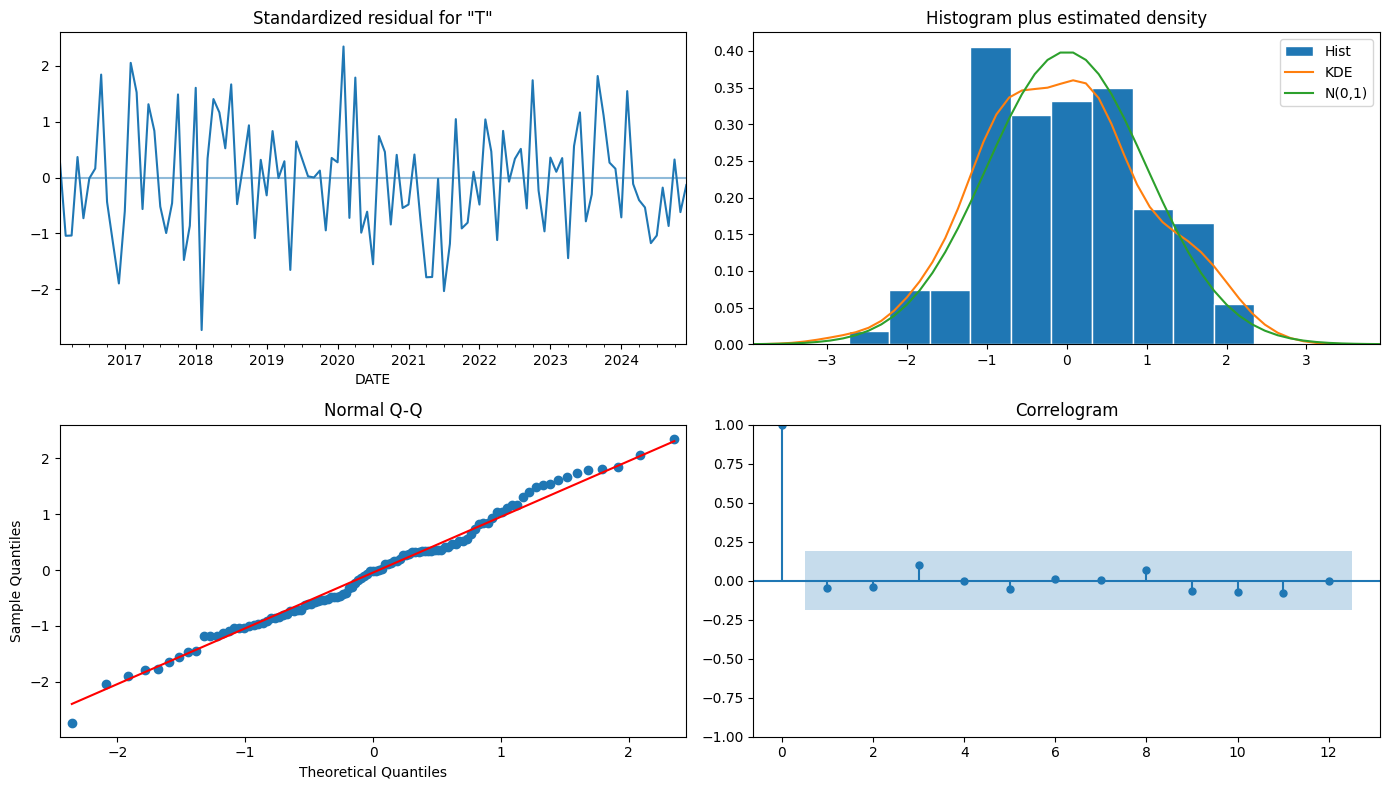

In [23]:
diag = sarima_result.plot_diagnostics(lags=12, figsize=(14, 8))
diag.tight_layout()

# Prediction

In [24]:
bestPred = sarima_result.predict('2025-1', '2025-12', exog = data_month)

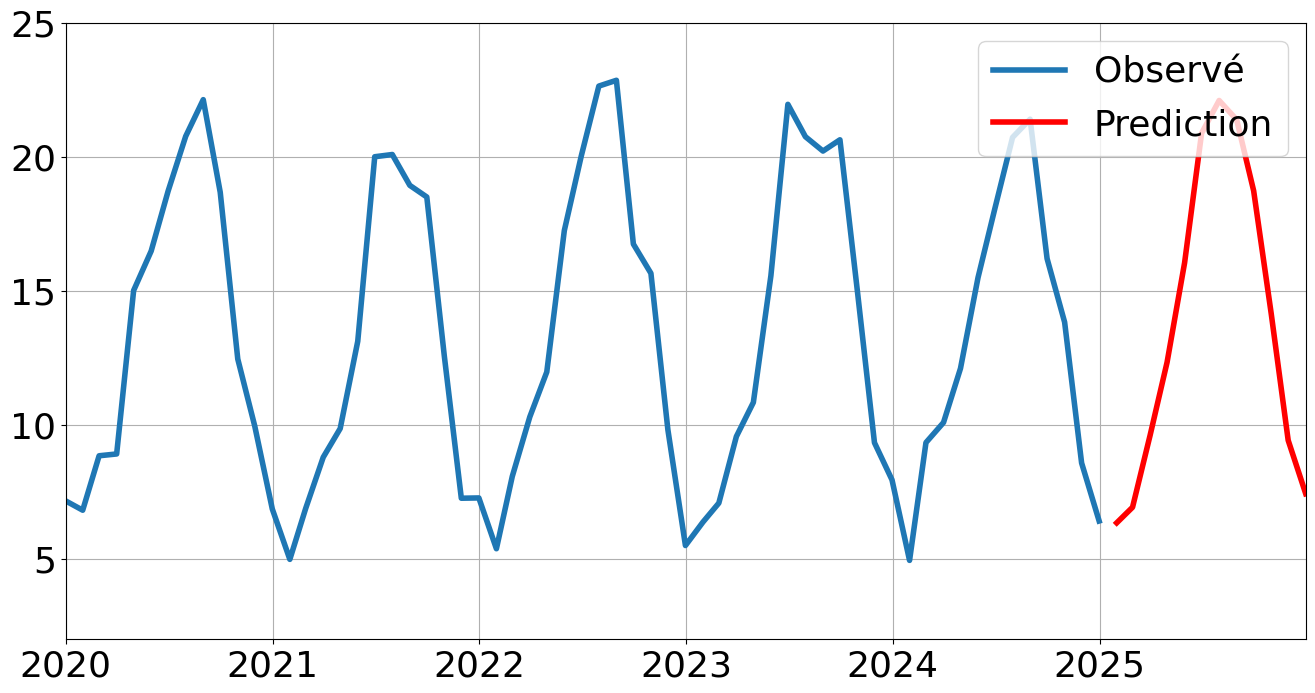

In [25]:
plt.figure(figsize=(16, 8))
plt.grid(True)
plt.tick_params(labelsize=14)
plt.xlim(datetime(2020, 1, 1), datetime(2025, 12, 31))
plt.ylim(2, 25)
plt.tick_params(labelsize=26)
plt.plot(data_month['TEMP'], label='Observé', linewidth=4)
plt.plot(bestPred, 'r', label='Prediction', linewidth=4)
plt.legend(fontsize=26, loc="upper right")
plt.show()